In [36]:
from matplotlib import pyplot as plt
import cv2
import numpy as np


def imshow(title = "", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspectRatio = w / h
    plt.figure(figsize=(size * aspectRatio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [37]:
def getContours(imageFile):
    grayScaleImage2 = cv2.cvtColor(imageFile, cv2.COLOR_BGR2GRAY)
    edgedImage = cv2.Canny(grayScaleImage2, 30, 200)

    contours, hierarchy = cv2.findContours(edgedImage, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    return contours


In [38]:
def difference(val1, val2):
    setContours1 = set(map(tuple, [np.ravel(contour).tolist() for contour in val1]))
    setContours2 = set(map(tuple, [np.ravel(contour).tolist() for contour in val2]))

    diffContours = setContours1 - setContours2

    numDiffContours = len(diffContours)
    return numDiffContours

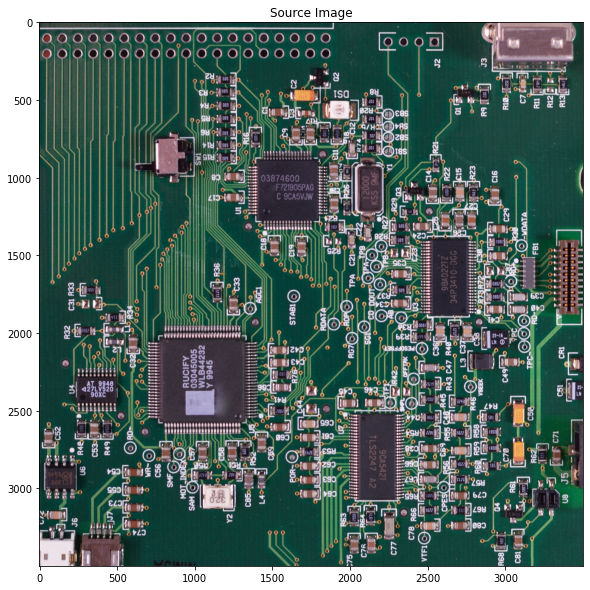

Source Image RES:  3500 x 3500


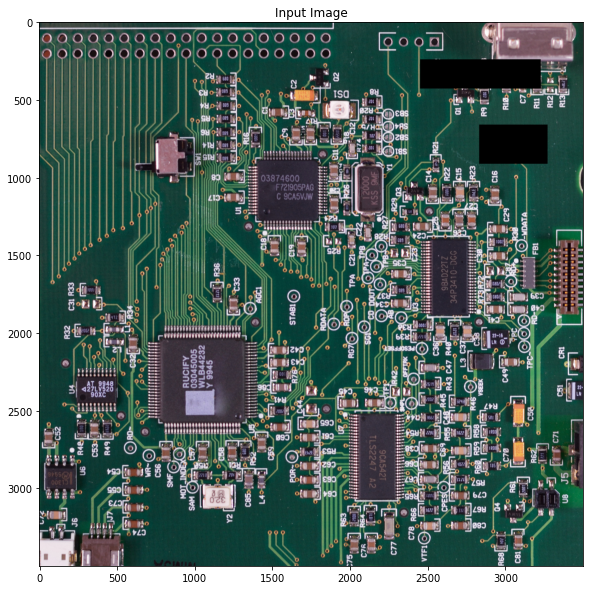

Input Image RES:  3500 x 3500


218

In [39]:
sourceImage = cv2.imread('./new-pexels-photo-343457.jpg')
imshow('Source Image', sourceImage)
print('Source Image RES: ', sourceImage.shape[0],'x',sourceImage.shape[1])

inputImage = cv2.imread('./input-pexels-photo-343457.jpg')
imshow('Input Image', inputImage)
print('Input Image RES: ', inputImage.shape[0],'x',inputImage.shape[1])

difference(getContours(sourceImage), getContours(inputImage))

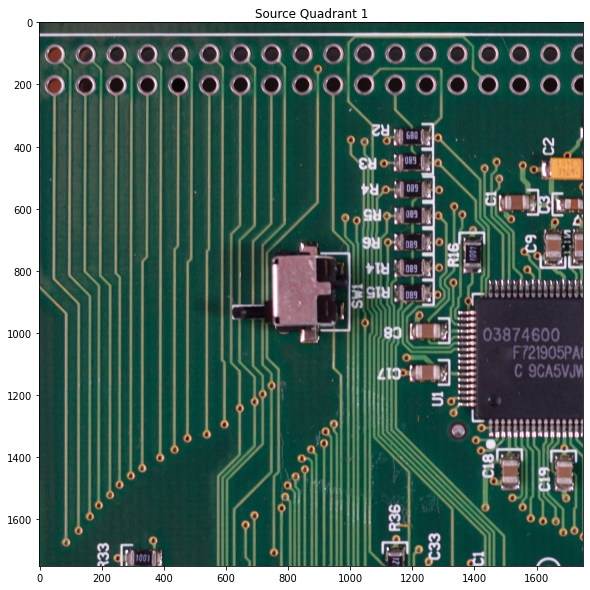

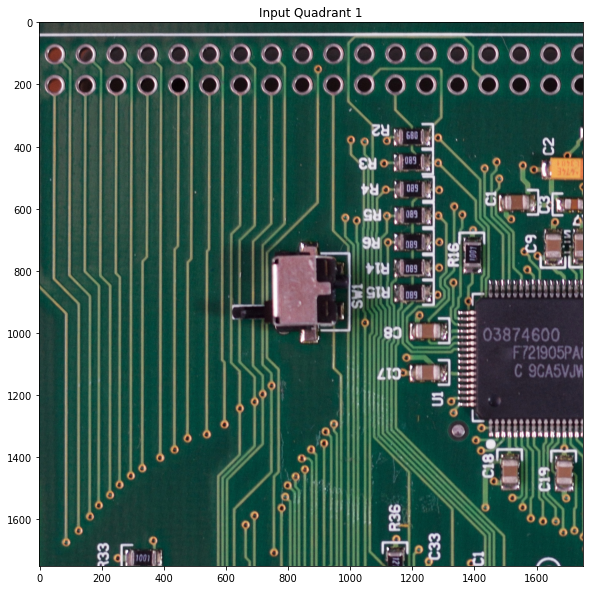

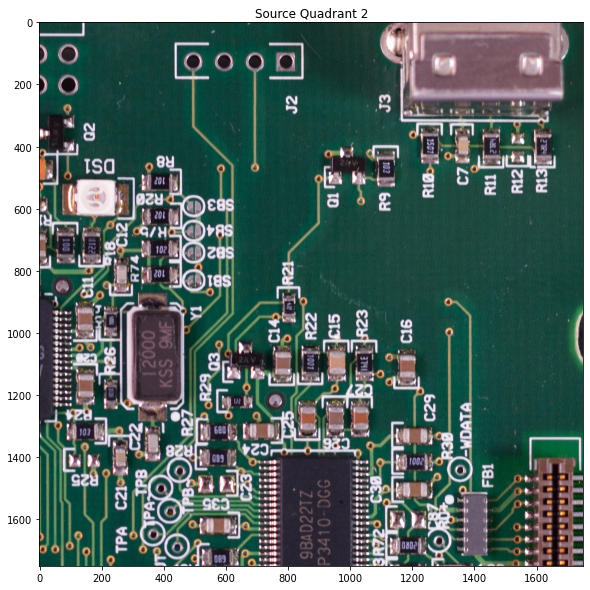

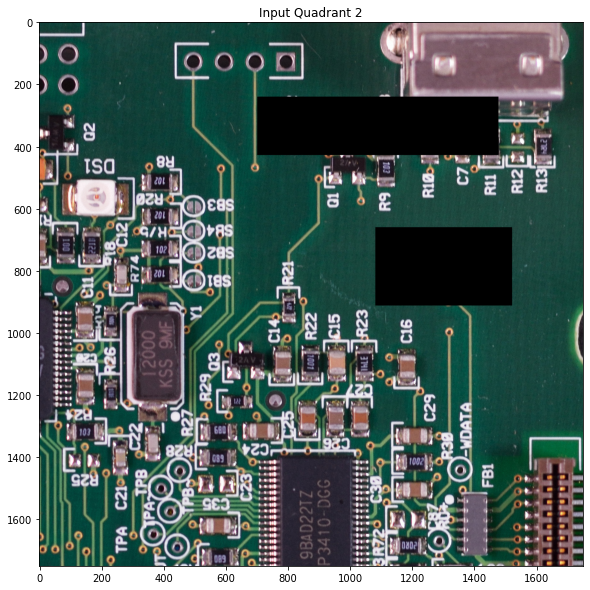

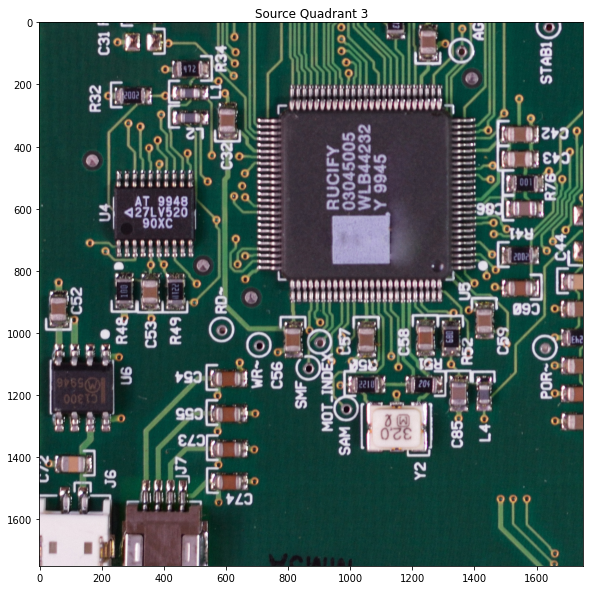

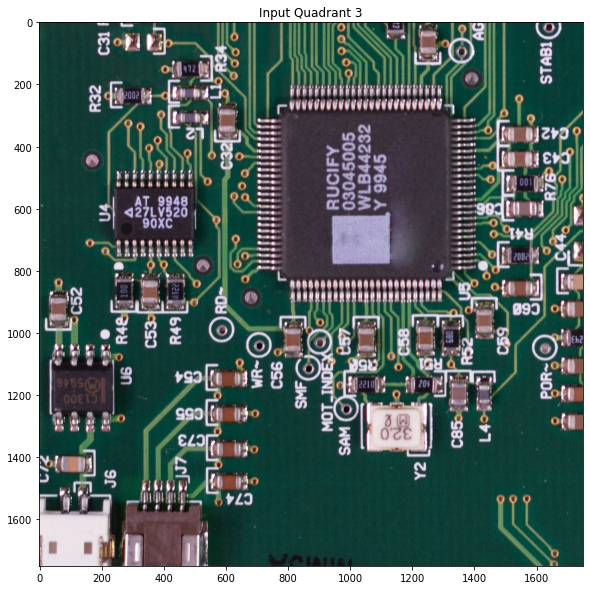

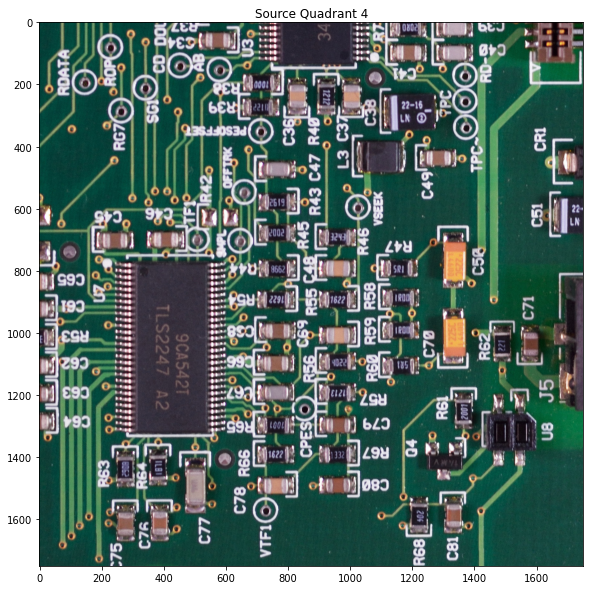

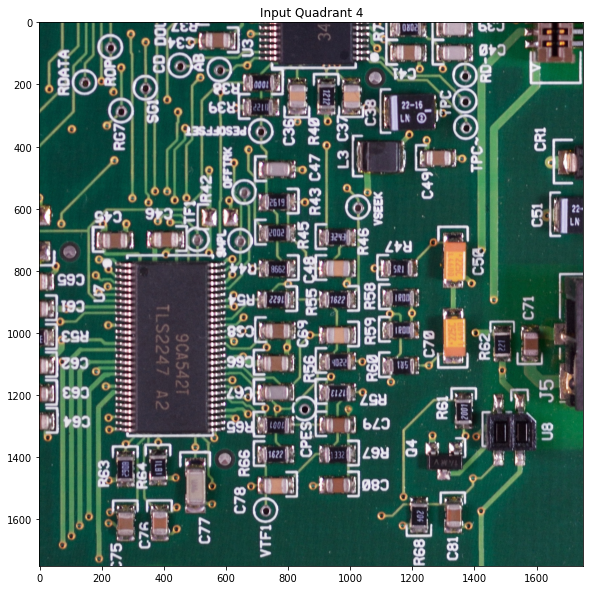

In [40]:
height, width, channels = sourceImage.shape

quadrant_width = width // 2
quadrant_height = height // 2

sQ1 = sourceImage[:quadrant_height, :quadrant_width, :]
sQ2 = sourceImage[:quadrant_height, quadrant_width:, :]
sQ3 = sourceImage[quadrant_height:, :quadrant_width, :]
sQ4 = sourceImage[quadrant_height:, quadrant_width:, :]


height, width, channels = inputImage.shape

quadrant_width = width // 2
quadrant_height = height // 2

iQ1 = inputImage[:quadrant_height, :quadrant_width, :]
iQ2 = inputImage[:quadrant_height, quadrant_width:, :]
iQ3 = inputImage[quadrant_height:, :quadrant_width, :]
iQ4 = inputImage[quadrant_height:, quadrant_width:, :]

imshow("Source Quadrant 1", sQ1)
imshow("Input Quadrant 1", iQ1)

imshow("Source Quadrant 2", sQ2)
imshow("Input Quadrant 2", iQ2)

imshow("Source Quadrant 3", sQ3)
imshow("Input Quadrant 3", iQ3)

imshow("Source Quadrant 4", sQ4)
imshow("Input Quadrant 4", iQ4)

In [41]:
sourceImageArray = [sQ1, sQ2, sQ3, sQ4]
inputImageArray = [iQ1, iQ2, iQ3, iQ4]

effectedAreaList = []
for i in range(len(sourceImageArray)):
    diff = difference(getContours(sourceImageArray[i]), getContours(inputImageArray[i]))
    if diff != 0:
        effectedAreaList.append(1)
    else:
        effectedAreaList.append(0) 



effectedAreaList

[0, 1, 0, 0]